In [1]:
pip install padasip

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import padasip as pa
import librosa as librosa
import IPython.display as ipd
import soundfile as sf

In [3]:
# load samples
def display (original_sound, name):
  plt.title(name)
  plt.plot(original_sound)
  plt.show()

In [33]:
sound = "phone_jingle_noise_Kasia_greensilicone_normal_2024-01-19_16.30.44.processed.wav"

In [34]:
sound, sample_rate = librosa.load(sound, mono=False)

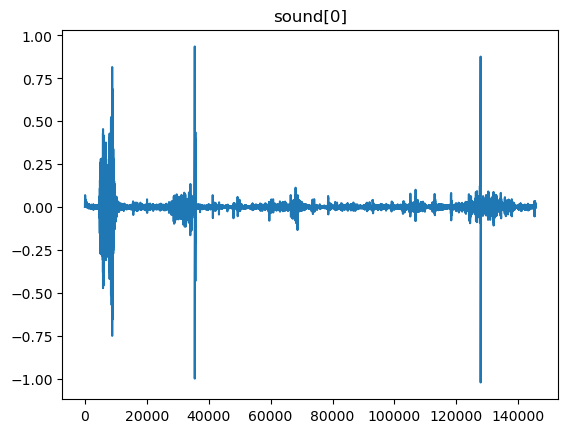

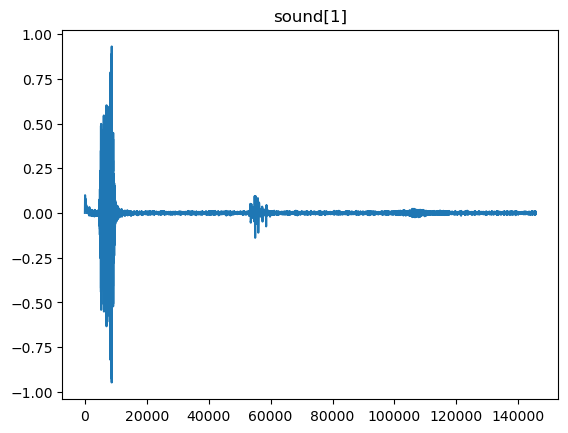

In [35]:
display(sound[0], "sound[0]")
display(sound[1], "sound[1]")

(145638,)


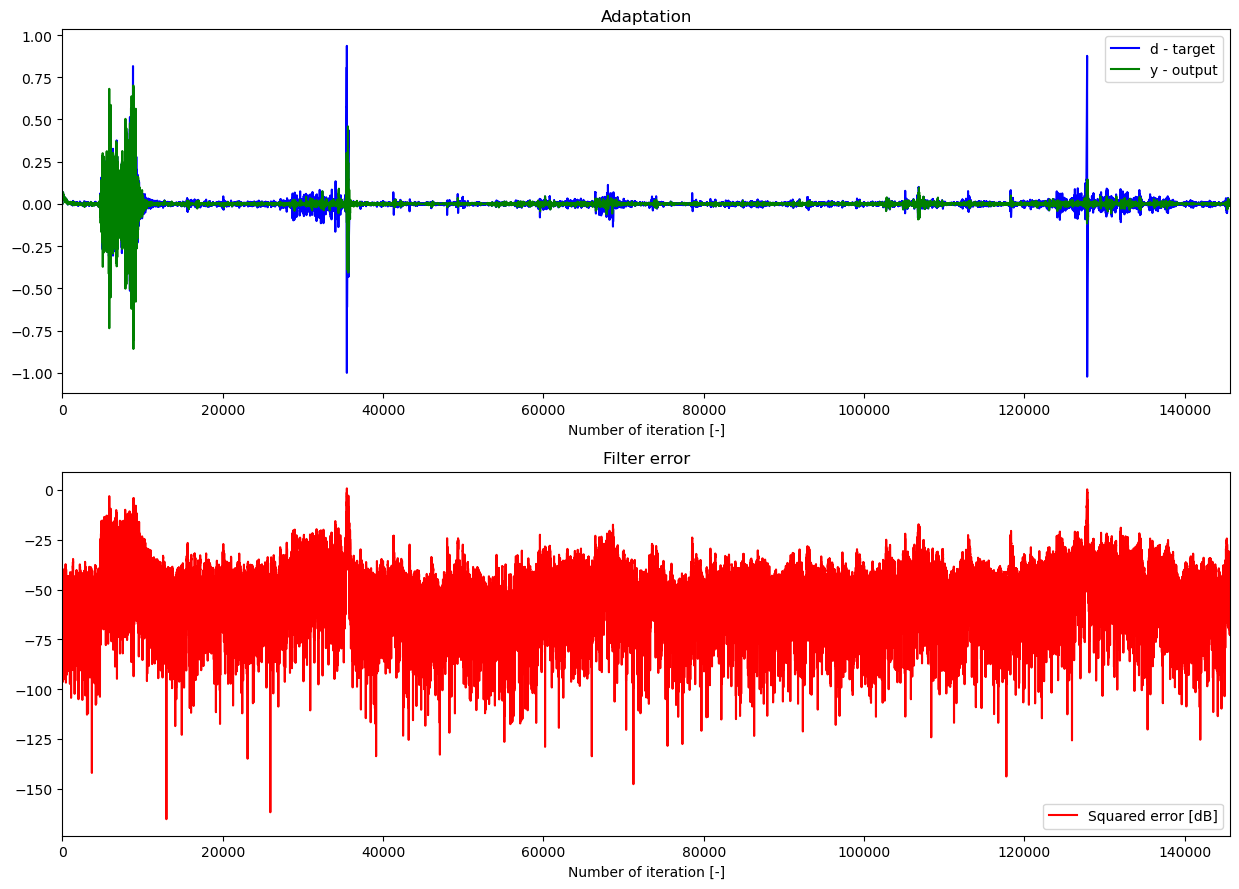

And the resulting coefficients are: [0.66948793 0.42479434 0.27567431 0.29468286]


In [36]:
# filtering
#def filtering(original_sound, order):
n = 4
d = sound[0]
d = d[:-n+1] # I know this is not the best way to align both arrays but I didn't know how to 
N = len(d)
x = pa.input_from_history(sound[1], n)
print(d.shape)

# identification
f = pa.filters.FilterNLMS(mu=0.5, n=n) # mu=learning rate
y, e, w = f.run(d, x)

# show results
plt.figure(figsize=(12.5,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("Number of iteration [-]")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output")
plt.xlim(0, N)
plt.legend()

plt.subplot(212); plt.title("Filter error"); plt.xlabel("Number of iteration [-]")
plt.plot(pa.misc.logSE(e),"r", label="Squared error [dB]");plt.legend()
plt.xlim(0, N)
plt.tight_layout()
plt.show()
print("And the resulting coefficients are: {}".format(w[-1]))

In [37]:
#listen to sample
ipd.Audio(y, rate=22050)

In [38]:
ipd.Audio(sound, rate=22050)

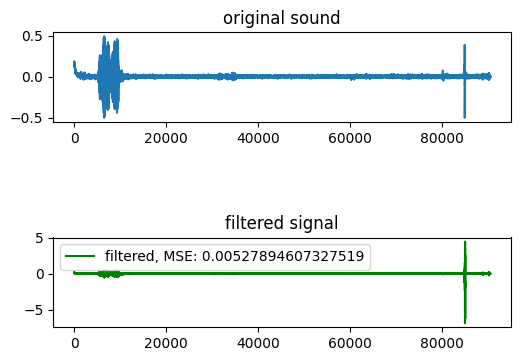

In [0]:
filtered_sound = filtering(sound, 100)